<a href="https://colab.research.google.com/github/ChaimaBouhlel/Deep-learning-lab-1-perceptron/blob/main/tp1_perceptron_mono_couche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

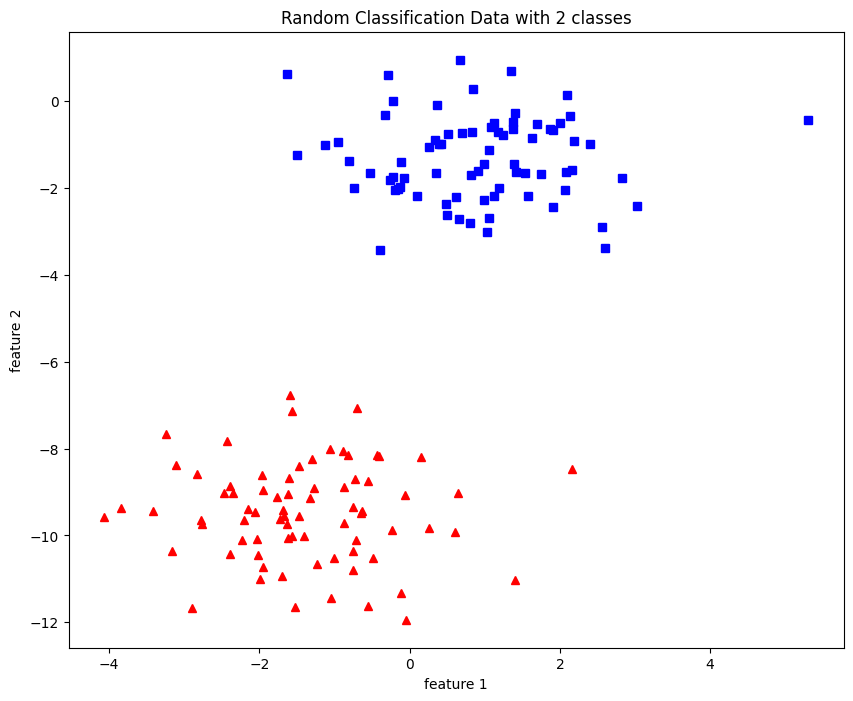

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.make_blobs (n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
def acti_func(z):
   return 1 if z > 0 else 0

def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.zeros((n+1,1))
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
        w = w + lr * (y[idx] - y_hat) * x_i
        # Incrementing by 1.
        n_miss += 1
        # Appending number of misclassified examples
        # at every iteration.
    n_miss_list.append(n_miss)
  return w, n_miss_list

In [ ]:
learning_rate = 0.01
num_epochs = 3

def plot_decision_boundary(X, w):
    # X --> Inputs
    # w --> parameters
    # Calcul de la pente (m) et de l'ordonnée à l'origine (c) de la ligne de décision
    # X --> Inputs
    # w --> parameters
    # The Line is y=mx+c
    # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
    # Solving we find m and c
    m = -w[1] / w[2]  # pente
    c = -w[0] / w[2]  # ordonnée à l'origine

    # Détermination des points de la ligne de décision
    x1 = [np.min(X[:, 0]), np.max(X[:, 0])]
    x2 = m * x1 + c

    # Tracé de la ligne de décision
    plt.plot(x1, x2, label='Decision Boundary')
    plt.legend()

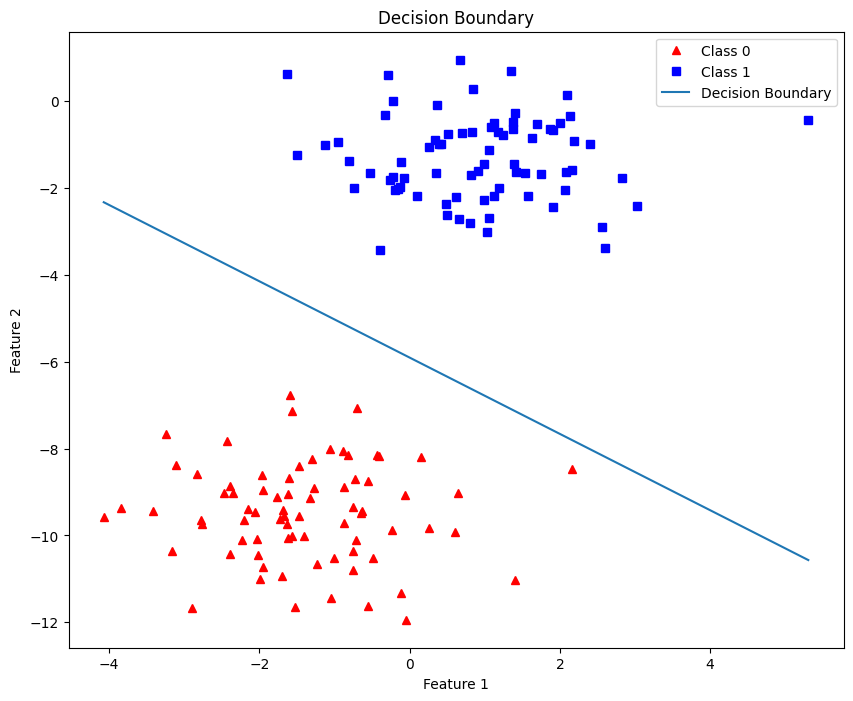

In [ ]:
weights, miss_list = perceptron(X, y, learning_rate, num_epochs)

# Tracé de la limite de décision
plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 1')
plot_decision_boundary(X, weights)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Decision Boundary')
plt.legend()
plt.show()

quand perceptron donne de meilleurs resultats: si les donnees sont proches ou eloignées?

Dimensions de l'ensemble d'entraînement X : (200, 2)
Dimensions de l'ensemble de test X : (50, 2)
Dimensions de l'ensemble d'entraînement y : (200,)
Dimensions de l'ensemble de test y : (50,)


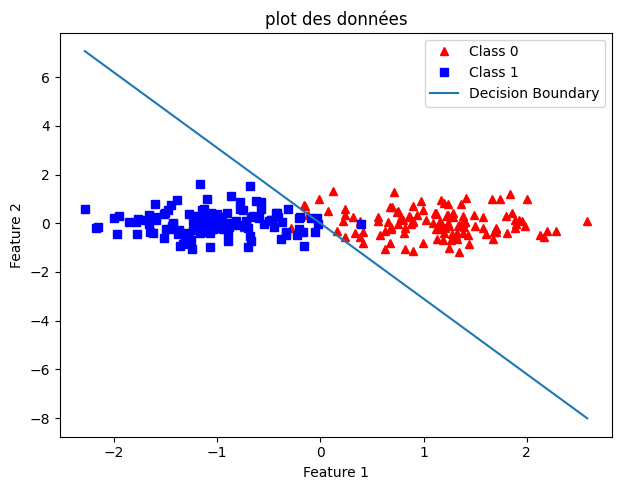

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Définition des paramètres
n_samples = 250
n_features = 2
test_size = 0.2
random_state = 42
sigma_squared = 0.25

# Génération des données de la classe -1
mean_1 = [-1, 0]
X1 = np.random.normal(loc=mean_1, scale=np.sqrt(sigma_squared), size=(n_samples // 2, n_features))
y1 = np.full((n_samples // 2,), 1)

# Génération des données de la classe 0
mean_2 = [1, 0]
X2 = np.random.normal(loc=mean_2, scale=np.sqrt(sigma_squared), size=(n_samples // 2, n_features))
y2 = np.full((n_samples // 2,), 0)

# Fusionner les données
X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

# Mélanger les données
np.random.seed(random_state)
shuffle_indices = np.random.permutation(n_samples)

X_shuffled = X[shuffle_indices]
y_shuffled = y[shuffle_indices]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_size, random_state=random_state)

# Vérification des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement X :", X_train.shape)
print("Dimensions de l'ensemble de test X :", X_test.shape)
print("Dimensions de l'ensemble d'entraînement y :", y_train.shape)
print("Dimensions de l'ensemble de test y :", y_test.shape)


weights, miss_list = perceptron(X_shuffled, y_shuffled, learning_rate, num_epochs)

# Tracé de la limite de décision
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(X_shuffled[:, 0][y_shuffled == 0], X_shuffled[:, 1][y_shuffled == 0], 'r^', label='Class 0')
plt.plot(X_shuffled[:, 0][y_shuffled == 1], X_shuffled[:, 1][y_shuffled == 1], 'bs', label='Class 1')

plot_decision_boundary(X, weights)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('plot des données')
plt.legend()
plt.tight_layout()
plt.show()

Dimensions de l'ensemble d'entraînement X : (200, 2)
Dimensions de l'ensemble de test X : (50, 2)
Dimensions de l'ensemble d'entraînement y : (200,)
Dimensions de l'ensemble de test y : (50,)


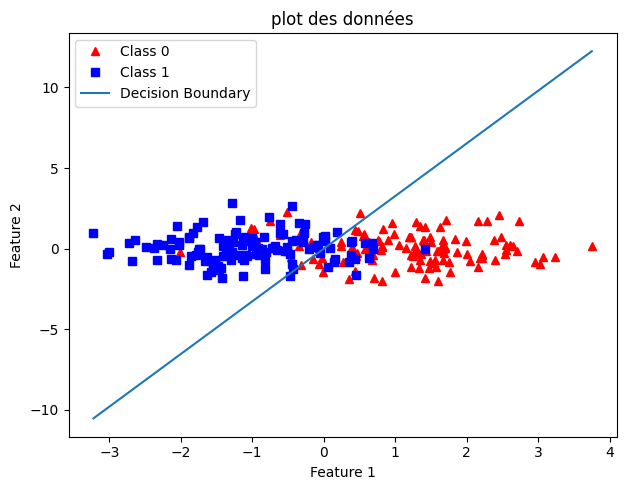

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Définition des paramètres
n_samples = 250
n_features = 2
test_size = 0.2
random_state = 42
sigma_squared = 0.75

# Génération des données de la classe -1
mean_1 = [-1, 0]
X1 = np.random.normal(loc=mean_1, scale=np.sqrt(sigma_squared), size=(n_samples // 2, n_features))
y1 = np.full((n_samples // 2,), 1)

# Génération des données de la classe 0
mean_2 = [1, 0]
X2 = np.random.normal(loc=mean_2, scale=np.sqrt(sigma_squared), size=(n_samples // 2, n_features))
y2 = np.full((n_samples // 2,), 0)

# Fusionner les données
X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

# Mélanger les données
np.random.seed(random_state)
shuffle_indices = np.random.permutation(n_samples)

X_shuffled = X[shuffle_indices]
y_shuffled = y[shuffle_indices]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_size, random_state=random_state)

# Vérification des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement X :", X_train.shape)
print("Dimensions de l'ensemble de test X :", X_test.shape)
print("Dimensions de l'ensemble d'entraînement y :", y_train.shape)
print("Dimensions de l'ensemble de test y :", y_test.shape)


weights, miss_list = perceptron(X_shuffled, y_shuffled, learning_rate, num_epochs)

# Tracé de la limite de décision
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(X_shuffled[:, 0][y_shuffled == 0], X_shuffled[:, 1][y_shuffled == 0], 'r^', label='Class 0')
plt.plot(X_shuffled[:, 0][y_shuffled == 1], X_shuffled[:, 1][y_shuffled == 1], 'bs', label='Class 1')

plot_decision_boundary(X, weights)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('plot des données')
plt.legend()
plt.tight_layout()
plt.show()

Exactitude de la classification sur l'ensemble de test : 0.5064


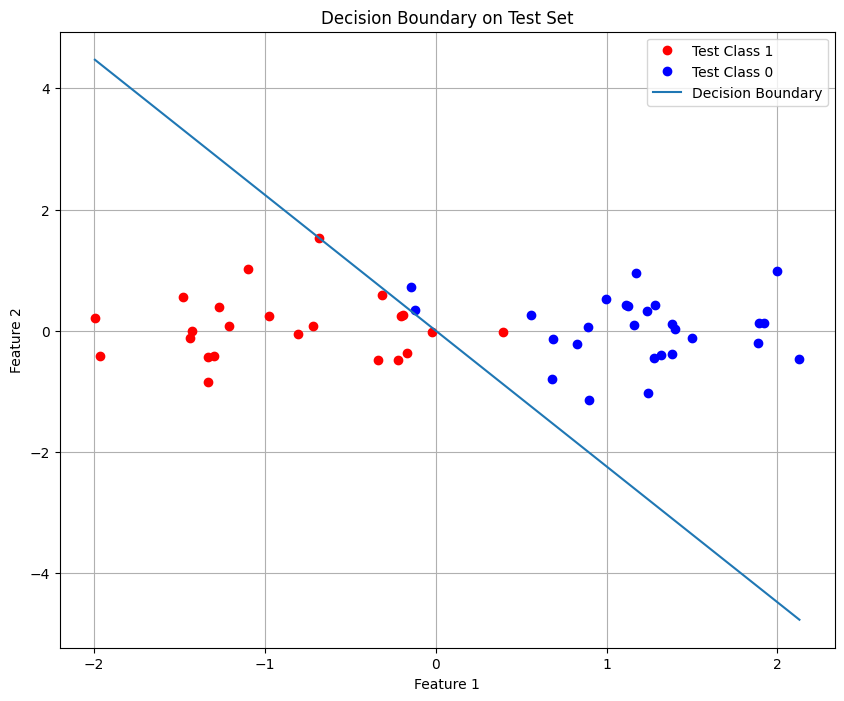

Étiquettes de classe uniques : [0 1]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Définition des paramètres
n_samples = 250
n_features = 2
test_size = 0.2
random_state = 42
sigma_squared = 0.25

# Génération des données de la classe -1
mean_1 = [-1, 0]
X1 = np.random.normal(loc=mean_1, scale=np.sqrt(sigma_squared), size=(n_samples // 2, n_features))
y1 = np.full((n_samples // 2,), 1)

# Génération des données de la classe 0
mean_2 = [1, 0]
X2 = np.random.normal(loc=mean_2, scale=np.sqrt(sigma_squared), size=(n_samples // 2, n_features))
y2 = np.full((n_samples // 2,), 0)

# Fusionner les données
X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

# Mélanger les données
np.random.seed(random_state)
shuffle_indices = np.random.permutation(n_samples)

X_shuffled = X[shuffle_indices]
y_shuffled = y[shuffle_indices]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_size, random_state=random_state)

# Entraînement du perceptron
weights, _ = perceptron(X_train, y_train, learning_rate, num_epochs)

# Fonction pour faire des prédictions
def predict(X, w):
    return np.where(np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), w) > 0, 1, 0)

# Prédictions sur l'ensemble de test
y_pred = predict(X_test, weights)

# Calcul de l'exactitude
accuracy = np.mean(y_pred == y_test)
print("Exactitude de la classification sur l'ensemble de test :", accuracy)

# Tracé de la limite de décision sur l'ensemble de test
plt.figure(figsize=(10, 8))
plt.plot(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 'ro', label='Test Class 1')
plt.plot(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 'bo', label='Test Class 0')
plot_decision_boundary(X_test, weights)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Decision Boundary on Test Set');
plt.legend()
plt.grid(True)
plt.show()
unique_labels = np.unique(y)
print("Étiquettes de classe uniques :", unique_labels)
